In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [91]:
spdf = pd.read_csv('Sparkling.csv')

# Data definition

In [92]:
spdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [93]:
spdf.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


# Data description


In [94]:
spdf.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [95]:
spdf.tail()

,YearMonth,Sparkling
182,1995-03,1897
183,1995-04,1862
184,1995-05,1670
185,1995-06,1688
186,1995-07,2031


## Organize dataset

In [96]:
Date = pd.date_range(start="1980-01-01", periods=187, freq="M")
Date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [97]:
spdf["Date"] = Date

In [98]:
spdf.drop("YearMonth", axis=1, inplace=True)

In [99]:
spdf.set_index("Date", inplace=True)

In [100]:
spdf.head()

,Sparkling
Date,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [101]:
spdf.index.freq = "M"

# Time series plot

In [102]:
from pylab import rcParams # or we can write plt.rcParams['figure.figsize'] = 15,8
rcParams['figure.figsize'] = 15,8

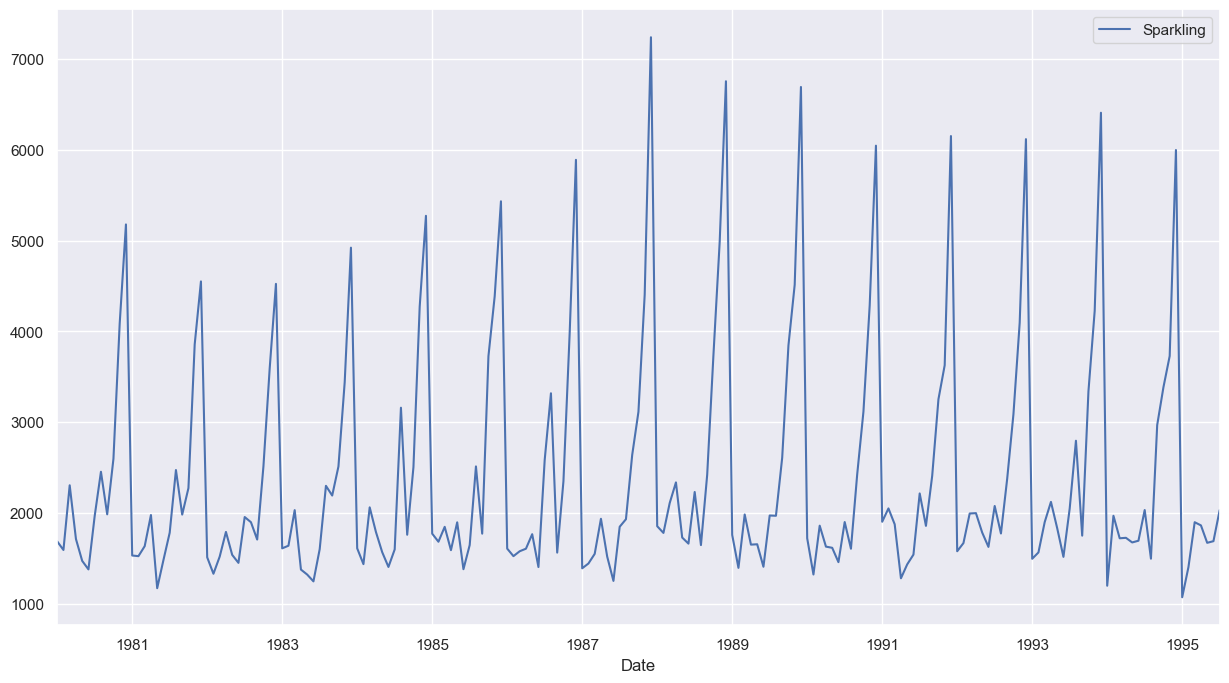

In [103]:
spdf.plot()
plt.show()

# Box plot

## Yearly box plot

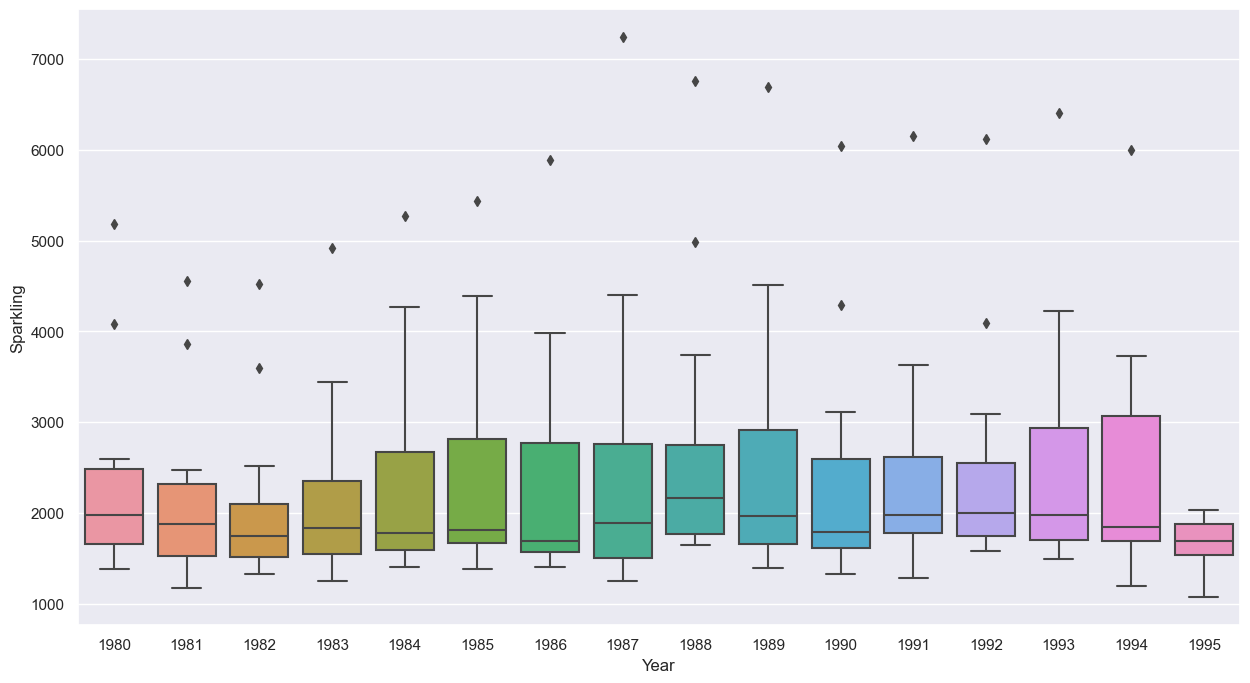

In [104]:
sns.boxplot(x = spdf.index.year, y = spdf["Sparkling"])
plt.xlabel('Year')
plt.show()

## Monthly box plot

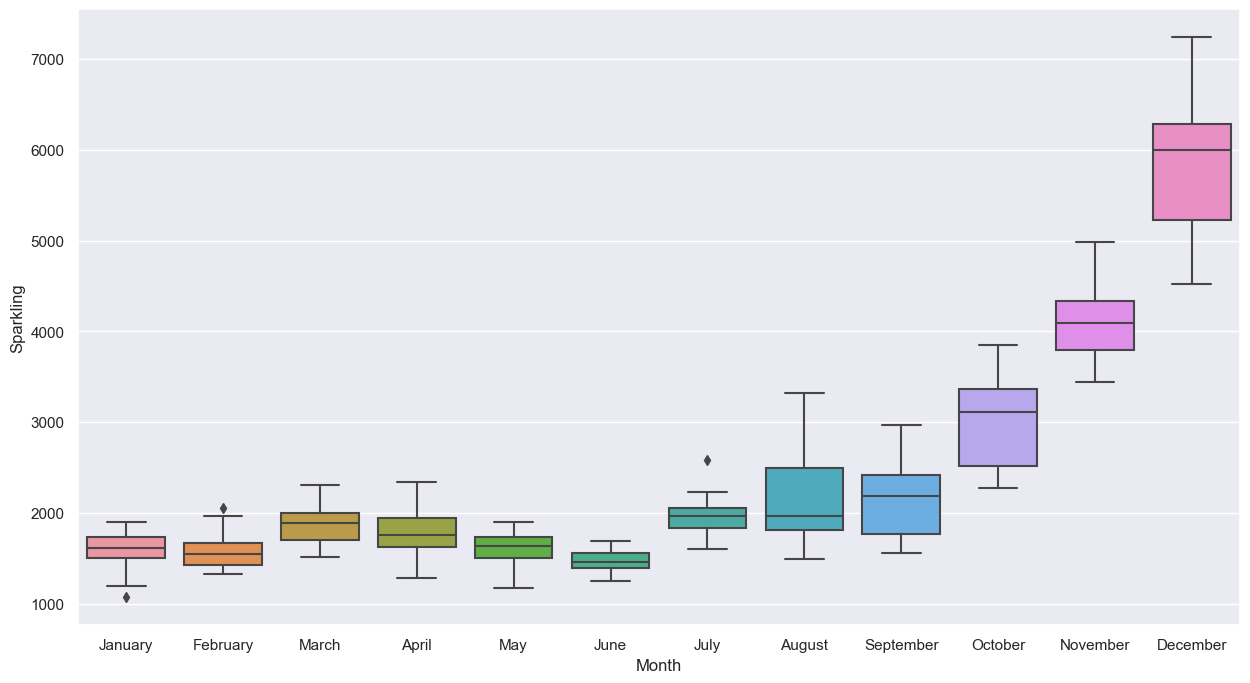

In [105]:
sns.boxplot(x = spdf.index.month_name(), y = spdf["Sparkling"])
plt.xlabel('Month')
plt.show()

## Monthly sales for Sparkling Wine across years for each month

In [106]:
from statsmodels.graphics.tsaplots import month_plot

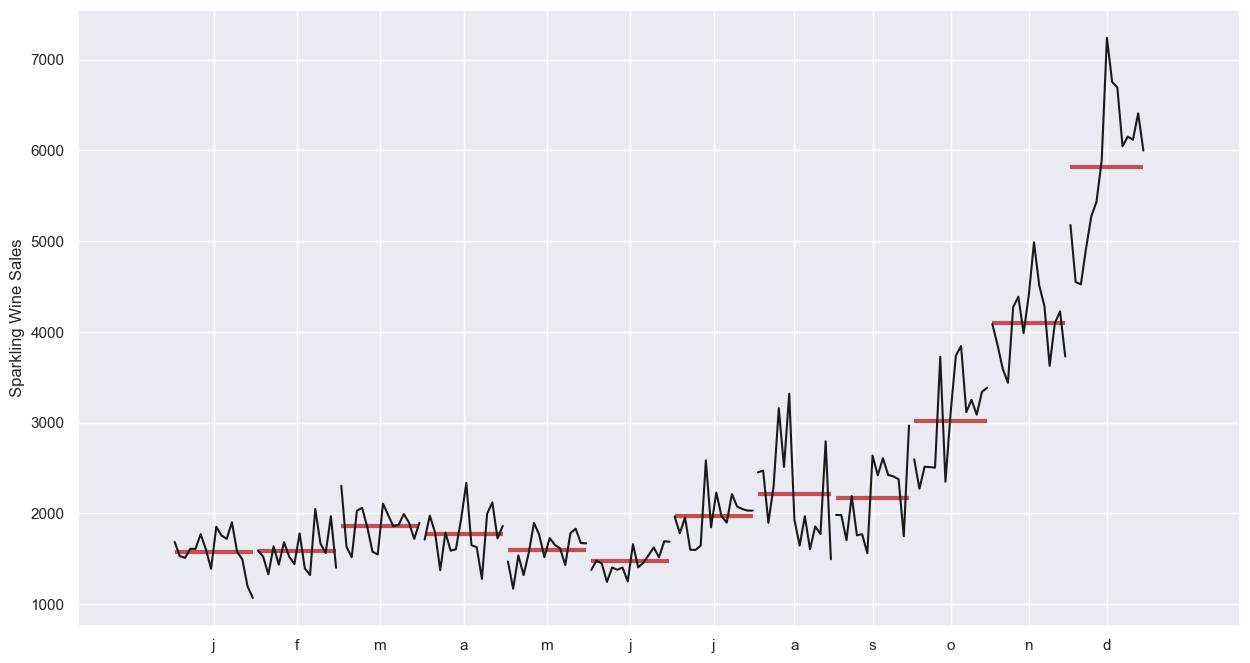

In [107]:
month_plot(spdf, ylabel="Sparkling Wine Sales")

# Decompose the Time Series

In [108]:
from statsmodels.tsa.seasonal import seasonal_decompose

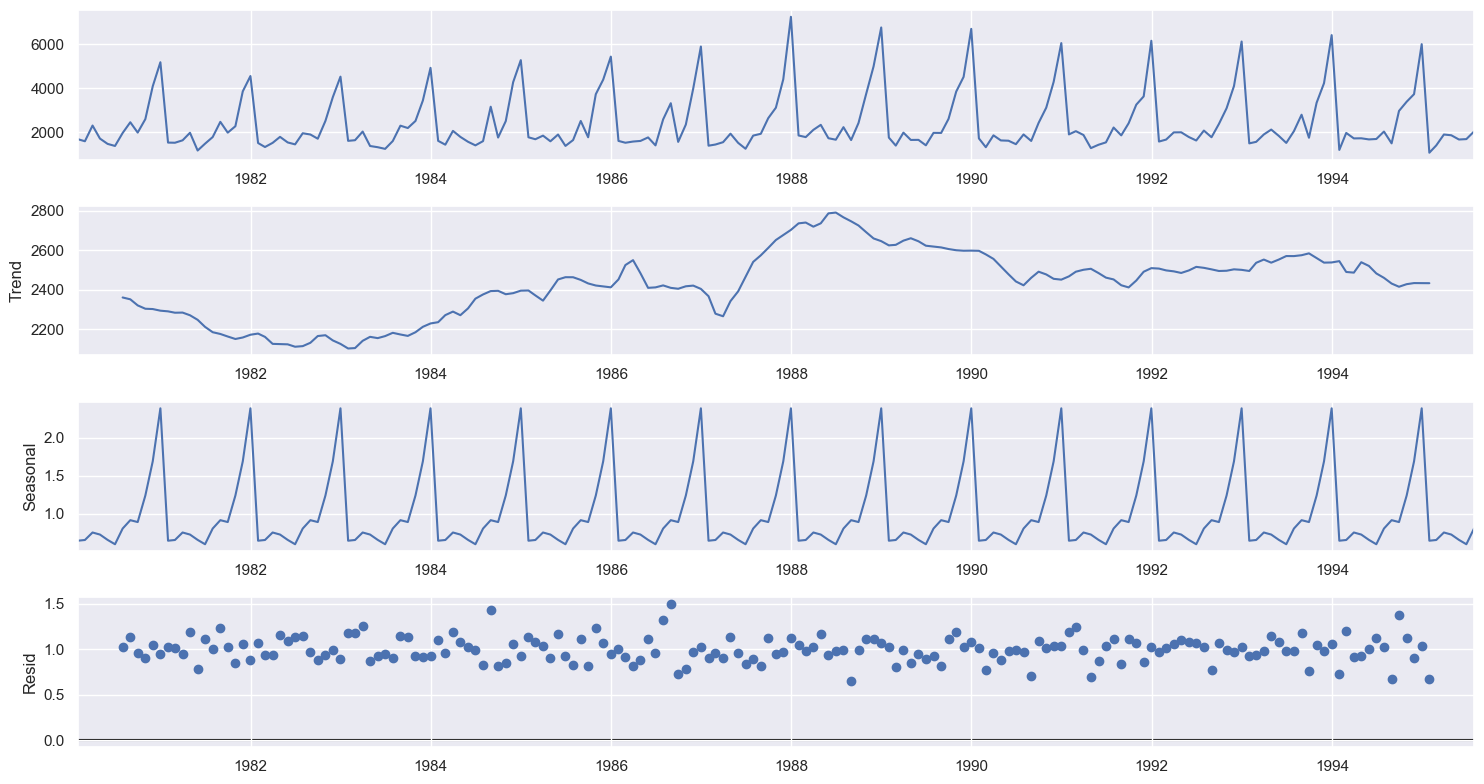

In [109]:
decomposition = seasonal_decompose(spdf, model="multiplicative")
decomposition.plot()

## Trend, Seasonality and Residual

In [110]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print("Trend", "\n", trend.head(12), "\n")
print("Seasonality", "\n", seasonality.head(12), "\n")
print("Residual", "\n", residual.head(12), "\n")

Trend 
 Date
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Freq: M, Name: trend, dtype: float64 

Seasonality 
 Date
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Freq: M, Name: seasonal, dtype: float64 

Residual 
 Date
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Freq: M

# Train test split & plot

In [111]:
train = spdf[0:int(len(spdf)*0.7)]
test = spdf[int(len(spdf)*0.7):]

In [112]:
train.shape, test.shape

((130, 1), (57, 1))

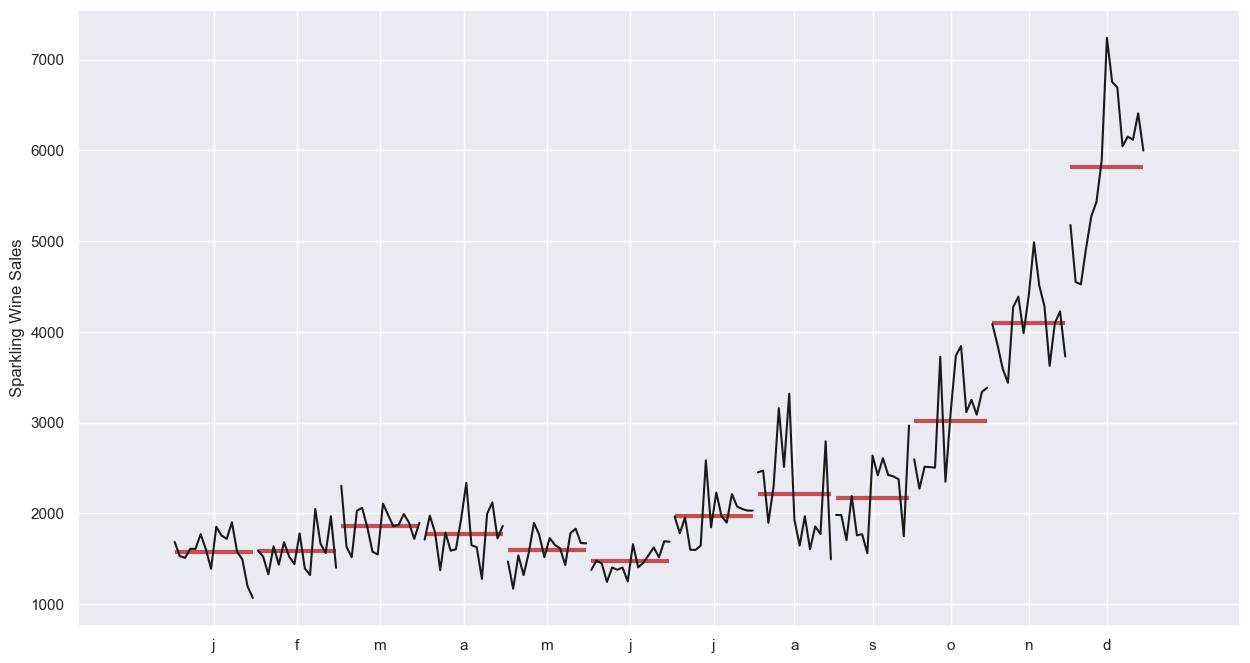

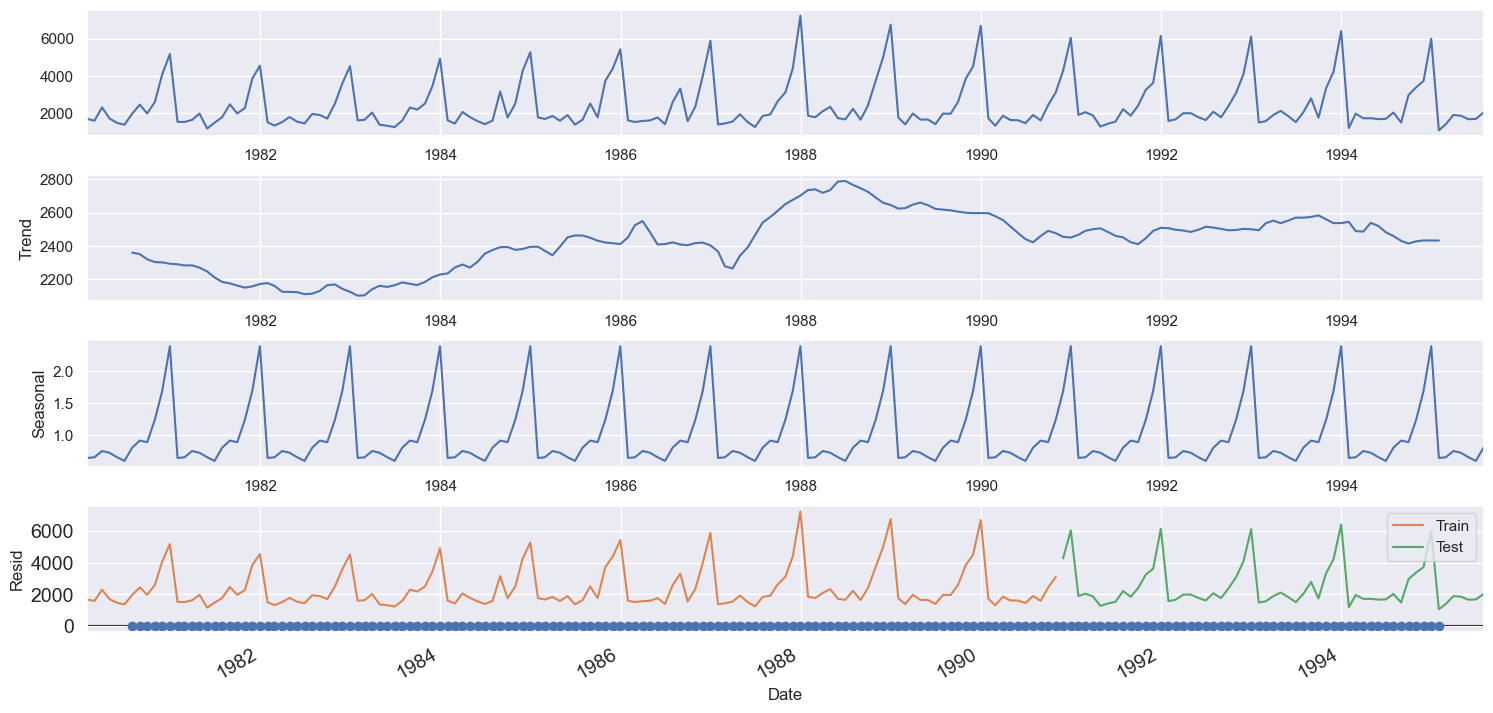

In [113]:
train["Sparkling"].plot(legend = True, label = "Train", fontsize = 14)
test["Sparkling"].plot(legend = True, label = "Test", fontsize = 14)
plt.show()

# Linear regression model – RMSE

We are going to regress the "Sparkling" variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [114]:
train_time  = [i + 1 for i in range(len(train))]
test_time  = [i + 131 for i in range(len(test))]
print("Training time instance", "\n", train_time)
print("Test time instance", "\n", test_time)
print(len(train), len(test))

Training time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]
Test time instance 
 [131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]
130 57


In [115]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [116]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [117]:
display(LinearRegression_train.head())
display(LinearRegression_train.tail())

,Sparkling,time
Date,,
1980-01-31,1686,1
1980-02-29,1591,2
1980-03-31,2304,3
1980-04-30,1712,4
1980-05-31,1471,5


,Sparkling,time
Date,,
1990-06-30,1457,126
1990-07-31,1899,127
1990-08-31,1605,128
1990-09-30,2424,129
1990-10-31,3116,130


In [118]:
from sklearn.linear_model import LinearRegression

In [119]:
lr = LinearRegression()

In [120]:
lr.fit(LinearRegression_train[["time"]], LinearRegression_train["Sparkling"])

LinearRegression()

In [121]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

In [122]:
LinearRegression_test.head(12)

,Sparkling,time,RegOnTime
Date,,,
1990-11-30,4286,131,2630.431485
1990-12-31,6047,132,2634.540715
1991-01-31,1902,133,2638.649945
1991-02-28,2049,134,2642.759175
1991-03-31,1874,135,2646.868405
1991-04-30,1279,136,2650.977635
1991-05-31,1432,137,2655.086864
1991-06-30,1540,138,2659.196094
1991-07-31,2214,139,2663.305324


Plot

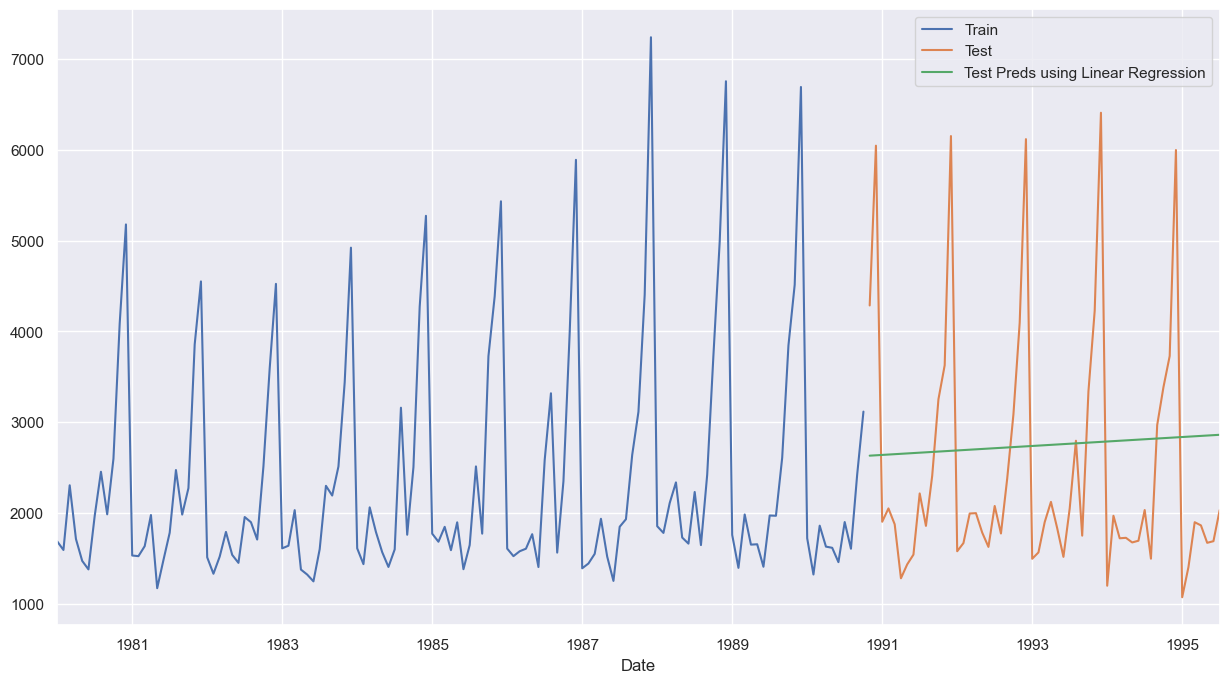

In [123]:
train["Sparkling"].plot(legend = True, label = 'Train')
test["Sparkling"].plot(legend = True, label = 'Test')
LinearRegression_test['RegOnTime'].plot(legend = True, label = 'Test Preds using Linear Regression')
plt.show()

Accuracy Metrics

In [124]:
from statsmodels.tools.eval_measures import rmse

Model Evaluation

In [125]:
rmse_model1_test = rmse(test["Sparkling"], test_predictions_model1)
rmse_model1_test

1392.438304864264

In [126]:
resultsDf = pd.DataFrame({"Test RMSE": [rmse_model1_test]}, index = ["RegressionOnTime"])
resultsDf

,Test RMSE
RegressionOnTime,1392.438305


# Naïve model – RMSE

In [127]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [128]:
NaiveModel_test["naive"] = train["Sparkling"][len(train["Sparkling"])-1]

In [129]:
NaiveModel_test["naive"].head()

Date
1990-11-30    3116
1990-12-31    3116
1991-01-31    3116
1991-02-28    3116
1991-03-31    3116
Freq: M, Name: naive, dtype: int64

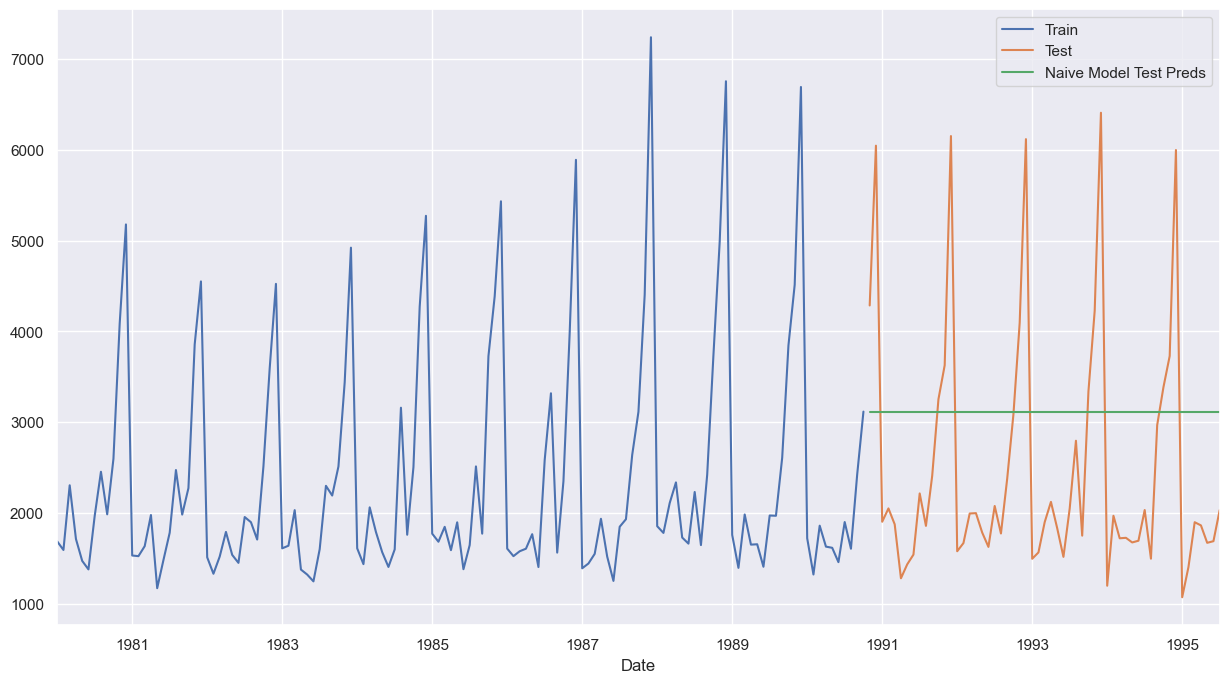

In [130]:
train["Sparkling"].plot(legend = True, label = "Train")
test["Sparkling"].plot(legend = True, label = "Test")
NaiveModel_test["naive"].plot(legend = True, label = "Naive Model Test Preds")
plt.show()

Model Evaluation

In [131]:
rmse_model2_test = rmse(test["Sparkling"], NaiveModel_test["naive"])
print("RMSE for Naive Bayes",rmse_model2_test)


resultsDf_2 = pd.DataFrame({"Test RMSE": [rmse_model2_test]}, index=["NaiveModel"])
resultsDf = pd.concat([resultsDf, resultsDf_2])
display(resultsDf)

RMSE for Naive Bayes 1496.4446285498805


,Test RMSE
RegressionOnTime,1392.438305
NaiveModel,1496.444629


# Simple average model – RMSE

In [132]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [133]:
SimpleAverage_test["mean_Sparkling"] = train["Sparkling"].mean()
SimpleAverage_test.head()

,Sparkling,mean_Sparkling
Date,,
1990-11-30,4286,2361.276923
1990-12-31,6047,2361.276923
1991-01-31,1902,2361.276923
1991-02-28,2049,2361.276923
1991-03-31,1874,2361.276923


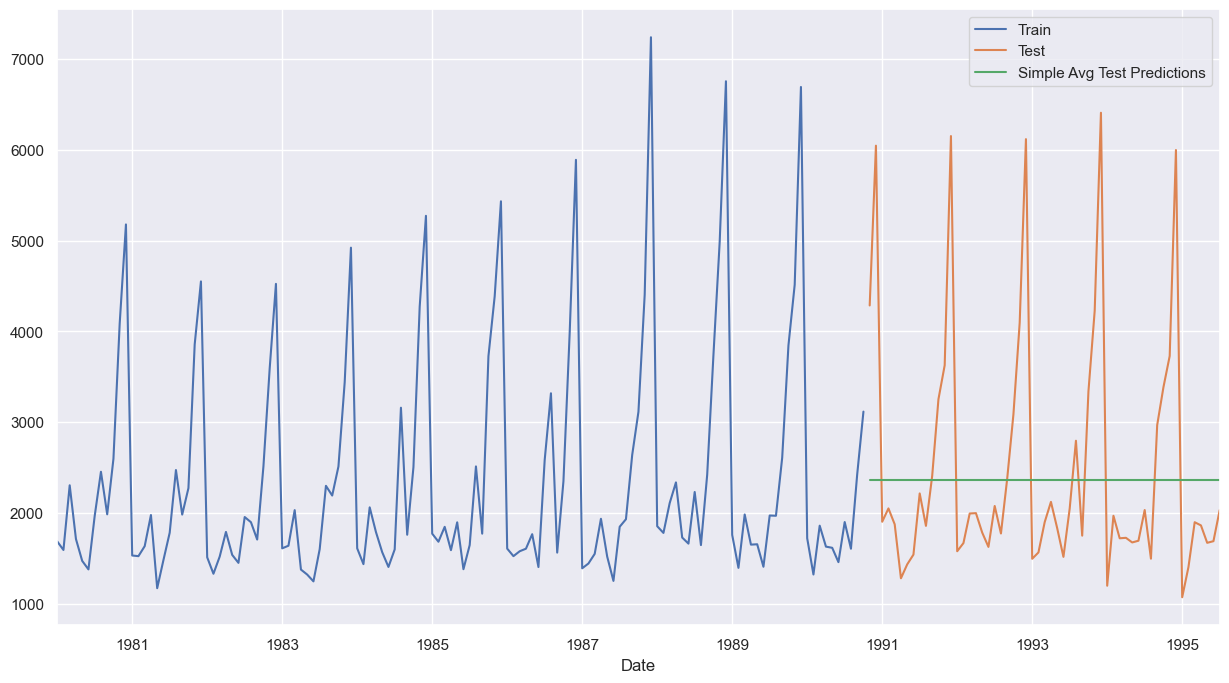

In [136]:
train["Sparkling"].plot(legend = True, label = "Train")
test["Sparkling"].plot(legend = True, label = "Test")
SimpleAverage_test["mean_Sparkling"].plot(legend = True, label = "Simple Avg Test Predictions")
plt.show()

Model Evaluation

In [137]:
rmse_model3_test = rmse(test["Sparkling"], SimpleAverage_test["mean_Sparkling"])
print("RMSE for Simple Average Model is", rmse_model3_test)

RMSE for Simple Average Model is 1368.7467168662013


In [139]:
reultsDf_3 = pd.DataFrame({"Test RMSE": [rmse_model3_test]}, index = ["SimpleAverageModel"])
resultsDf = pd.concat([resultsDf, reultsDf_3])
resultsDf                     


,Test RMSE
RegressionOnTime,1392.438305
NaiveModel,1496.444629
SimpleAverageModel,1368.746717


# Moving average model – RMSE

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

For Moving Average, we are going to average over the entire data.

In [142]:
MovingAverage = spdf.copy()
MovingAverage.head()

,Sparkling
Date,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


Trailing moving averages

In [144]:
MovingAverage["Trailing_2"] = MovingAverage["Sparkling"].rolling(2).mean()
MovingAverage["Trailing_4"] = MovingAverage["Sparkling"].rolling(4).mean()
MovingAverage["Trailing_6"] = MovingAverage["Sparkling"].rolling(6).mean()
MovingAverage["Trailing_9"] = MovingAverage["Sparkling"].rolling(9).mean()

MovingAverage.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Date,,,,,
1980-01-31,1686,NaN,NaN,NaN,NaN
1980-02-29,1591,1638.5,NaN,NaN,NaN
1980-03-31,2304,1947.5,NaN,NaN,NaN
1980-04-30,1712,2008.0,1823.25,NaN,NaN
1980-05-31,1471,1591.5,1769.50,NaN,NaN


Plot the data

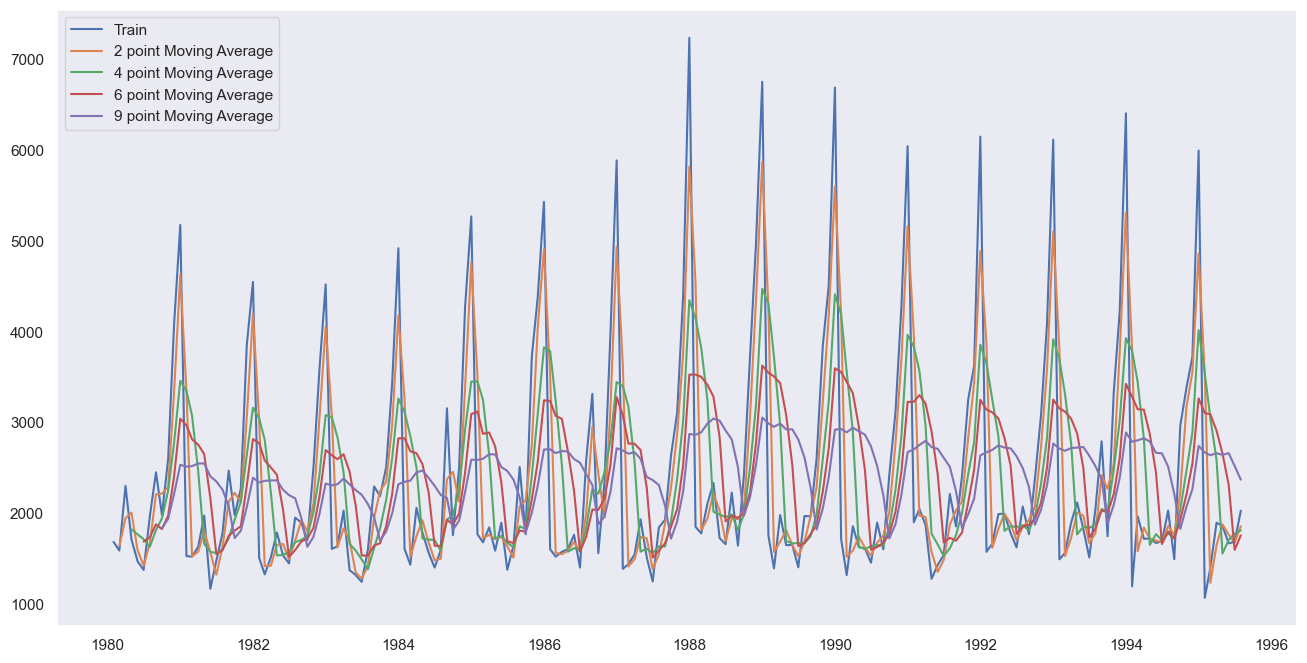

In [147]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage["Sparkling"], label="Train")
plt.plot(MovingAverage["Trailing_2"], label="2 point Moving Average")
plt.plot(MovingAverage["Trailing_4"], label="4 point Moving Average")
plt.plot(MovingAverage["Trailing_6"], label="6 point Moving Average")
plt.plot(MovingAverage["Trailing_9"], label="9 point Moving Average")

plt.legend(loc="best")
plt.grid()
plt.show()

Split the data into train and test and plot

In [149]:
trailing_MovingAverage_train = MovingAverage[0:int(len(MovingAverage)* 0.7)]
trailing_MovingAverage_test = MovingAverage[int(len(MovingAverage)* 0.7):]

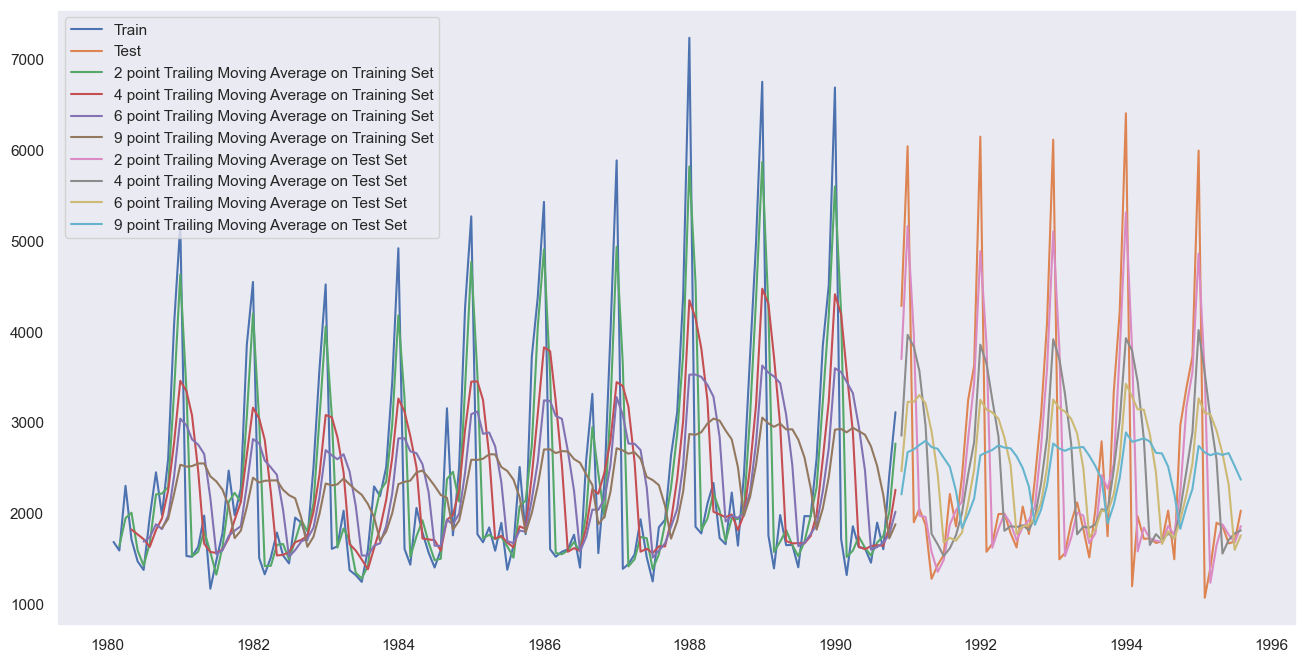

In [152]:
plt.figure(figsize=(16,8))

plt.plot(trailing_MovingAverage_train["Sparkling"], label="Train")
plt.plot(trailing_MovingAverage_test["Sparkling"], label="Test")

plt.plot(trailing_MovingAverage_train["Trailing_2"], label="2 point Trailing Moving Average on Training Set")
plt.plot(trailing_MovingAverage_train["Trailing_4"], label="4 point Trailing Moving Average on Training Set")
plt.plot(trailing_MovingAverage_train["Trailing_6"], label="6 point Trailing Moving Average on Training Set")
plt.plot(trailing_MovingAverage_train["Trailing_9"], label="9 point Trailing Moving Average on Training Set")

plt.plot(trailing_MovingAverage_test["Trailing_2"], label="2 point Trailing Moving Average on Test Set")
plt.plot(trailing_MovingAverage_test["Trailing_4"], label="4 point Trailing Moving Average on Test Set")
plt.plot(trailing_MovingAverage_test["Trailing_6"], label="6 point Trailing Moving Average on Test Set")
plt.plot(trailing_MovingAverage_test["Trailing_9"], label="9 point Trailing Moving Average on Test Set")

plt.legend(loc="best")
plt.grid()
plt.show()

Model Evaluation

In [153]:
rmse_model4_test_2 = rmse(test["Sparkling"], trailing_MovingAverage_test["Trailing_2"])
print("Rmse for trailing_2", rmse_model4_test_2)

rmse_model4_test_4 = rmse(test["Sparkling"], trailing_MovingAverage_test["Trailing_4"])
print("Rmse for trailing_4", rmse_model4_test_4)

rmse_model4_test_6 = rmse(test["Sparkling"], trailing_MovingAverage_test["Trailing_6"])
print("Rmse for trailing_6", rmse_model4_test_6)


rmse_model4_test_9 = rmse(test["Sparkling"], trailing_MovingAverage_test["Trailing_9"])
print("Rmse for trailing_9", rmse_model4_test_9)

resultsDf_4 = pd.DataFrame({"Test RMSE": [rmse_model4_test_2, rmse_model4_test_4, rmse_model4_test_6, rmse_model4_test_9]},
                          index = ["2_point_trailing_Moving_Average", "4_point_trailing_Moving_Average", "6_point_trailing_Moving_Average", "9_point_trailing_Moving_Average"])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Rmse for trailing_2 811.1789368221167
Rmse for trailing_4 1184.2132946361405
Rmse for trailing_6 1337.2005237587744
Rmse for trailing_9 1422.653280801376


,Test RMSE
RegressionOnTime,1392.438305
NaiveModel,1496.444629
SimpleAverageModel,1368.746717
2_point_trailing_Moving_Average,811.178937
4_point_trailing_Moving_Average,1184.213295
6_point_trailing_Moving_Average,1337.200524
9_point_trailing_Moving_Average,1422.653281


Plot of all models derived till now

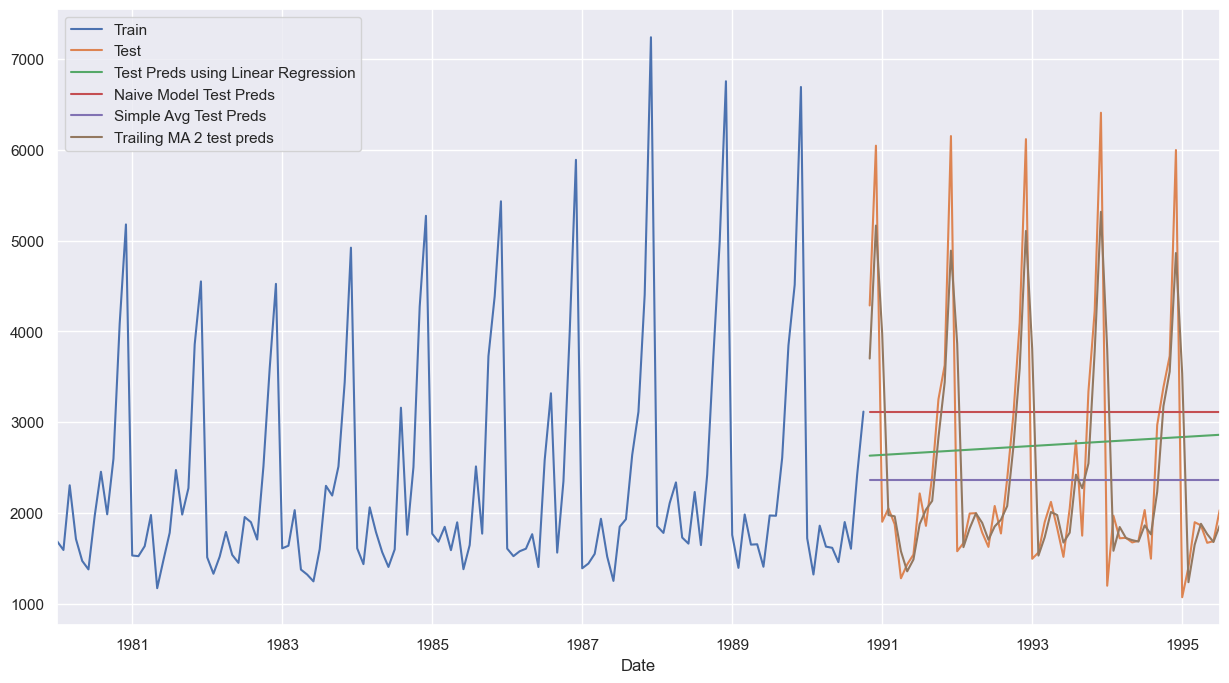

In [158]:
train["Sparkling"].plot(legend=True, label="Train")
test["Sparkling"].plot(legend=True, label="Test")

LinearRegression_test["RegOnTime"].plot(legend=True, label="Test Preds using Linear Regression")
NaiveModel_test["naive"].plot(legend=True, label="Naive Model Test Preds")
SimpleAverage_test["mean_Sparkling"].plot(legend=True, label="Simple Avg Test Preds")
trailing_MovingAverage_test["Trailing_2"].plot(legend=True, label="Trailing MA 2 test preds")

plt.show()




# Simple exponential smoothening – RMSE analysis

# Double exponential smoothening (Holt’s method) – RMSE analysis

# Triple exponential smoothening (Holt’s winter model) – RMSE analysis

# Stationarity check with AdFuller

# Make the data stationary with alpha 0.05

# Build ARIMA model with lowest AIC score – test this model on test data using RMSE

# Build SARIMA model with lowest AIC score – test this model on test data using RMSE

# Build table with all the above models with RMSE scores

# Use optimal model with lowest RMSE to predict 12 months into future with a plot and confidence intervals

# Business recommendations